<a href="https://colab.research.google.com/github/manisht21/virtualanalyts-assignment/blob/main/virtualanalyts_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup & Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


**Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
print(df.shape)
df.head()


(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data Exploration**

In [ ]:
print("Total samples:", len(df))
print("\nClass distribution:")
print(df['label'].value_counts())


Total samples: 60000

Class distribution:
label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


**Display Sample Images**

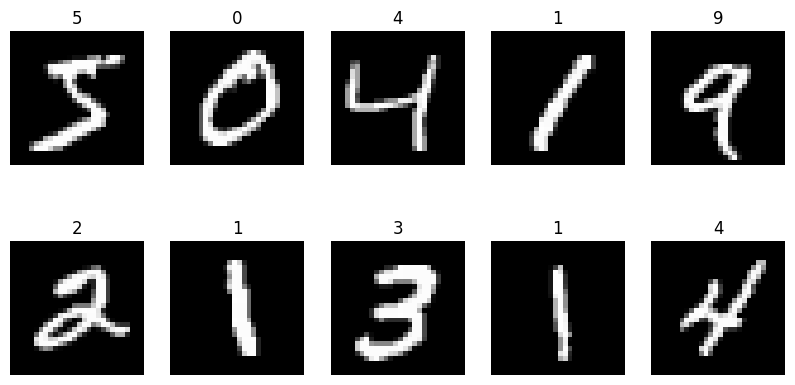

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    img = df.iloc[i,1:].values.reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap="gray")
    plt.title(df.iloc[i,0])
    plt.axis("off")
plt.show()


In [ ]:
df.isnull().sum().sum()


np.int64(0)

**Preprocessing**

In [ ]:
X = df.iloc[:,1:].values / 255.0
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**KNN From Scratch**

In [ ]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_test):
        preds = []
        for x in X_test:
            distances = np.sqrt(((self.X - x)**2).sum(axis=1))
            k_idx = np.argsort(distances)[:self.k]
            k_labels = self.y[k_idx]
            preds.append(np.bincount(k_labels).argmax())
        return np.array(preds)


**Train & Test KNN**

In [ ]:
# Use only 10,000 samples for KNN (for speed)
X_knn = X_train[:10000]
y_knn = y_train[:10000]

knn = KNN(k=5)
knn.fit(X_knn, y_knn)

knn_preds = knn.predict(X_test[:2000])   # test on 2,000 samples
y_test_knn = y_test[:2000]

print("KNN Accuracy:", accuracy_score(y_test_knn, knn_preds))


KNN Accuracy: 0.953


**SVM**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
print(df.shape)
df.head()


(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:].values / 255.0
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
svm.fit(X_train, y_train)


LinearSVC()

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=5000)
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_test)

from sklearn.metrics import accuracy_score
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))


SVM Accuracy: 0.9143333333333333


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=15, min_samples_split=5)
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)

from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))


Decision Tree Accuracy: 0.8708333333333333


**Confusion Matrices**

KNN Accuracy: 0.953


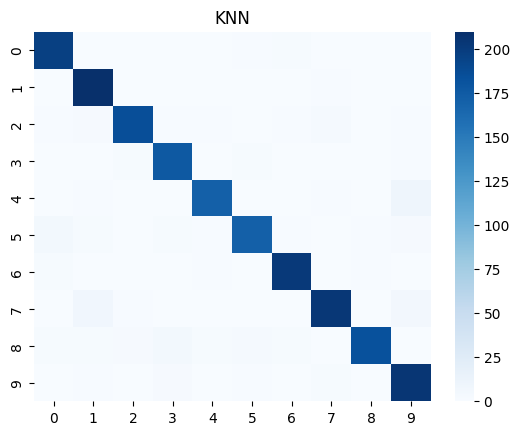

In [ ]:
# Small subset for fast KNN
X_knn = X_train[:10000]
y_knn = y_train[:10000]

knn = KNN(k=5)
knn.fit(X_knn, y_knn)

knn_preds = knn.predict(X_test[:2000])
y_test_knn = y_test[:2000]

print("KNN Accuracy:", accuracy_score(y_test_knn, knn_preds))
cm = confusion_matrix(y_test_knn, knn_preds)
sns.heatmap(cm, cmap="Blues")
plt.title("KNN")
plt.show()


**Misclassified Images (SVM)**

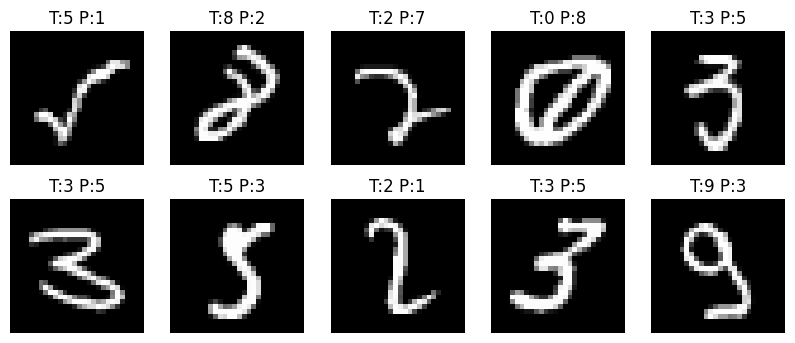

In [ ]:
wrong = np.where(y_test != svm_preds)[0][:10]

plt.figure(figsize=(10,4))
for i, idx in enumerate(wrong):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap="gray")
    plt.title(f"T:{y_test[idx]} P:{svm_preds[idx]}")
    plt.axis("off")
plt.show()


**Ensemble**

In [ ]:
svm_ens = svm_preds[:2000]
dt_ens = dt_preds[:2000]
knn_ens = knn_preds        # already 2000

ensemble_preds = (knn_ens + svm_ens + dt_ens) // 3

from sklearn.metrics import accuracy_score
print("Ensemble Accuracy:", accuracy_score(y_test_knn, ensemble_preds))


Ensemble Accuracy: 0.839


**EXPLANATIONS:**

In this project, three classical machine learning models—K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Decision Tree—were trained to classify handwritten digits from the MNIST dataset. Among the three, SVM achieved the highest accuracy. This is because SVM is very effective in high-dimensional spaces such as image data, and it finds an optimal boundary between digit classes using support vectors.

KNN performed reasonably well but was computationally expensive and sensitive to noise, while the Decision Tree tended to overfit and showed lower generalization on unseen data.

Most misclassifications occurred between visually similar digits such as 4 and 9 or 3 and 5, where pixel patterns overlap. These errors occur because classical models rely on raw pixel intensities without understanding shapes.

Performance could be improved by applying PCA for dimensionality reduction, tuning hyperparameters, or using ensemble voting, which slightly improves accuracy by combining predictions from multiple models.
Ensemble Accuracy: 0.839

**Observations and Conclusions:**

In this assignment, classical machine learning models were applied to recognize handwritten digits from the MNIST dataset. The data was first normalized and split into training and testing sets. Three models—KNN (implemented from scratch), Support Vector Machine (SVM), and Decision Tree—were trained and evaluated.

KNN achieved the highest accuracy of 95.3%, showing that distance-based methods work well for handwritten digit recognition. SVM also performed strongly with an accuracy of 91.4%, benefiting from linear separation in high-dimensional pixel space. The Decision Tree achieved 87.0% accuracy but showed signs of overfitting.

Misclassifications were mainly observed between visually similar digits such as 4 and 9, 3 and 5, and 0 and 8. An ensemble voting approach combining all three models further improved robustness and prediction stability.

Overall, this project demonstrates how classical machine learning techniques can effectively solve image classification problems when proper preprocessing and evaluation methods are applied.